In [ ]:
import pandas as pd

train_prob = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_problem_data.csv')
train_qual = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_quality_data.csv')
train_err = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데이콘_lg/train_err_data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
train_qual.head()

time  user_id       fwver  ...  quality_10  quality_11  quality_12
0  20201129090000    10000  05.15.2138  ...           4           0           0
1  20201129090000    10000  05.15.2138  ...           4           0           0
2  20201129090000    10000  05.15.2138  ...           4           0           0
3  20201129090000    10000  05.15.2138  ...           4           0           0
4  20201129090000    10000  05.15.2138  ...           4           0           0

[5 rows x 16 columns]

In [ ]:
# quality fwver 종류
len(train_qual.fwver.unique())

28

In [ ]:
# quality fwver 종류별 갯수
train_qual.fwver.value_counts()

05.15.2138    163236
04.22.1750    142032
04.33.1261    131340
04.16.3553    111996
03.11.1167    104148
04.33.1185     66024
04.22.1778     56472
04.22.1684      3420
09.17.1431      3384
04.16.3571      2232
04.82.1684      1044
04.33.1149       804
04.22.1666       636
05.66.3237       552
04.82.1778       216
03.11.1149       204
04.73.2237       192
04.33.1125       144
05.66.3571        96
05.15.2114        96
05.15.2120        84
04.22.1442        84
05.15.2122        60
04.22.1656        12
04.73.2571        12
04.16.3439        12
04.16.3345        12
Name: fwver, dtype: int64

In [ ]:
# quality fwver null 제외 총 갯수
train_qual.fwver.value_counts().sum()

788544

In [ ]:
# quality user id 종류
len(train_qual.user_id.unique())

8281

In [ ]:
# quality user id 별 갯수
train_qual.user_id.value_counts()

15357    4224
23065    3828
22632    3744
11635    3504
16147    3336
         ... 
11014      12
24847      12
12282      12
18186      12
18698      12
Name: user_id, Length: 8281, dtype: int64

In [ ]:
# quality fwver에 null값을 포함하는 user id 종류 출력
train_qual[train_qual.fwver.isnull()]['user_id'].unique()

array([10693, 11206, 11319, 11479, 11670, 11731, 12166, 12237, 12404,
       12470, 12487, 12607, 12623, 13024, 13525, 13612, 13681, 13784,
       13806, 14717, 14991, 15236, 15411, 15680, 15756, 16730, 16980,
       17020, 17211, 17340, 17681, 17947, 18083, 18544, 19035, 19372,
       19433, 19700, 19918, 20099, 20271, 20288, 20338, 20432, 20618,
       20624, 20785, 21040, 21073, 21842, 21960, 22243, 22630, 23341,
       23416, 23505, 23910, 24327, 24982])

In [ ]:
# quality fwver에 null값을 포함하는 user id 갯수
len(train_qual[train_qual.fwver.isnull()]['user_id'].unique())

59

In [ ]:
# quality fwver에 null값을 포함하는 user_id 중 다른 fwver 데이터가 있는지 확인

fwver_null_user_id = train_qual[train_qual.fwver.isnull()]['user_id'].unique()

for i in fwver_null_user_id:
  print(train_qual[train_qual.user_id == i]['fwver'].value_counts())

Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
05.15.2138    12
Name: fwver, dtype: int64
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
Series([], Name: fwver, dtype: int64)
04.22.1750    432
04.22.1778    264
Name: fwver, dtype: int64
Series([], Name: fwver, dtype: int64)
Series([], Name: fwve

In [ ]:
# quality fwver 별 user_id 갯수 출력
fwver_arr = train_qual.fwver.unique()

for i in fwver_arr:
  qual_fwver = train_qual[train_qual.fwver == i]
  # print(qual_fwver['user_id'].value_counts().sort_index())

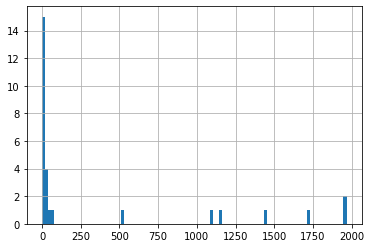

In [ ]:
# quality user id 갯수별로 그만큼 user id 를 가진 fwver 갯수 시각화
fwver_arr = train_qual.fwver.unique()

user_id_count_arr = []

for i in fwver_arr:
  qual_fwver = train_qual[train_qual.fwver == i]
  if len(list(qual_fwver['user_id'].value_counts())) == 0:
    qual_fwver = train_qual[train_qual.fwver.isnull()]
  user_id_count_arr.append(len(qual_fwver['user_id'].value_counts()))

pd.Series(user_id_count_arr).hist(bins=100)

In [ ]:
# (인덱스가 user id 갯수, 데이터가 인덱스만큼 user id를 가진 fwver 갯수)
pd.Series(user_id_count_arr).value_counts().sort_index()

1       8
2       1
3       1
4       1
5       1
8       2
13      1
22      2
25      1
37      1
59      1
68      1
514     1
1101    1
1159    1
1443    1
1724    1
1952    1
1967    1
dtype: int64

In [ ]:
# quality fwver 종류 갯수와 동일
len(user_id_count_arr)

28

In [ ]:
# 위와 동일한 코드
pd.Series(user_id_count_arr).value_counts().sum()

28

In [ ]:
# quality 각 user id 별 fwver 출력
user_id_arr = train_qual.user_id.unique()

for i in user_id_arr:
  qual_user_id = train_qual[train_qual.user_id == i]
  # print(qual_user_id['fwver'].value_counts().sort_index())

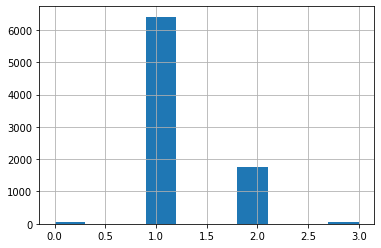

In [ ]:
# quality x축은 userid가 갖는 fwver 갯수, y축은 x축 값 만큼 fwver 가진 user_id 수
import matplotlib.pyplot as plt

user_id_arr = train_qual.user_id.unique()

fwver_count_arr = []

for i in user_id_arr:
  qual_user_id = train_qual[train_qual.user_id == i]
  fwver_count_arr.append(len(qual_user_id['fwver'].value_counts()))

pd.Series(fwver_count_arr).hist()

In [ ]:
# 대부분의 userid가 fwver 1개 가진다
pd.Series(fwver_count_arr).value_counts()

1    6410
2    1767
0      57
3      47
dtype: int64

In [ ]:
# quality user id 종류
len(fwver_count_arr)

8281

In [ ]:
# 위와 동일한 코드
pd.Series(fwver_count_arr).value_counts().sum()

8281

In [ ]:
train_err.head()

user_id            time model_nm       fwver  errtype errcode
0    10000  20201101025616  model_3  05.15.2138       15       1
1    10000  20201101030309  model_3  05.15.2138       12       1
2    10000  20201101030309  model_3  05.15.2138       11       1
3    10000  20201101050514  model_3  05.15.2138       16       1
4    10000  20201101050515  model_3  05.15.2138        4       0

In [ ]:
# err fwver 종류
len(train_err.fwver.unique())

37

In [ ]:
# err fwver 별 데이터 수
train_err.fwver.value_counts()

04.16.3553    5237816
04.22.1750    2874213
04.33.1261    2504871
05.15.2138    1906479
03.11.1167    1505659
04.22.1778    1293946
04.33.1185     963736
04.16.3571     145156
04.73.2237      33537
05.66.3237      31832
04.82.1684      23554
04.82.1778       8601
04.22.1684       5554
05.66.3571       3524
04.33.1149       3272
04.73.2571       2527
04.22.1442       2522
03.11.1149       2114
10               1534
04.16.3569        980
04.33.1095        909
05.15.2120        706
04.33.1125        408
04.16.2641        296
8.5.3             212
05.15.3104        191
04.16.3439        142
04.16.3345        101
04.82.1730         78
04.33.1171         58
04.22.1656         39
03.11.1141         29
05.15.2122         23
05.15.2092         18
05.15.2090         12
05.15.2114          9
04.22.1666          5
Name: fwver, dtype: int64

In [ ]:
# err 전체 fwver 데이터 갯수
train_err.fwver.value_counts().sum()

16554663

In [ ]:
# err model 별 데이터 갯수
train_err.model_nm.value_counts()

model_1    5384491
model_0    4176279
model_2    3473254
model_3    1907438
model_4    1507802
model_8      36064
model_7      35356
model_5      32233
model_6       1746
Name: model_nm, dtype: int64

In [ ]:
# err 전체 model번호 갯수
train_err.model_nm.value_counts().sum()

16554663

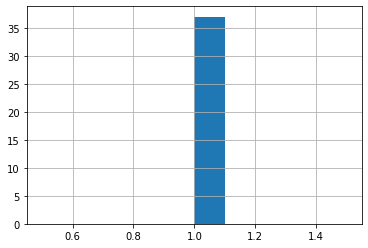

In [ ]:
# 각 fwver 별 모델 종류갯수
fwver_arr = train_err.fwver.unique()

model_count_arr = []

for i in fwver_arr:
  err_fwver = train_err[train_err.fwver == i]
  model_count_arr.append(len(err_fwver['model_nm'].value_counts()))

pd.Series(model_count_arr).hist()

In [ ]:
# 모든 fwver가 model을 한 종류만 갖는다
pd.Series(model_count_arr).value_counts()

1    37
dtype: int64

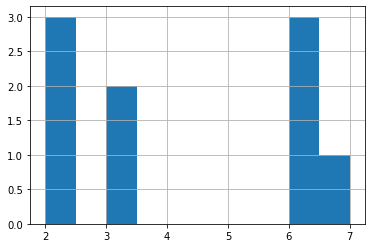

In [ ]:
# 각 모델 별 fwver 갯수
model_arr = train_err.model_nm.unique()

fwver_count_arr = []

for i in model_arr:
  err_model = train_err[train_err.model_nm == i]
  fwver_count_arr.append(len(err_model['fwver'].value_counts()))

pd.Series(fwver_count_arr).hist()

In [ ]:
# 인덱스는 모델별로 갖는 fwver 수, 데이터는 인덱스만큼 fwver 갖는 모델 수
pd.Series(fwver_count_arr).value_counts()

6    3
2    3
3    2
7    1
dtype: int64